# Cross-validation for parameter tuning, model selection, and feature selection
*Adapted from the video series: [Introduction to machine learning with scikit-learn](https://github.com/justmarkham/scikit-learn-videos)*

## Single Vvalidation / Holdout Set

In [1]:
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
import numpy as np

In [2]:
# read in the iris data
iris = datasets.load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

In [3]:
# use train/test split with different random_state values
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=4)

# check logistic regression
lr_model = linear_model.LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.921052631579


## Steps for K-fold cross-validation

1. Split the dataset into K **equal** partitions (or "folds").
2. Use fold 1 as the **testing set** and the union of the other folds as the **training set**.
3. Calculate **testing accuracy**.
4. Repeat steps 2 and 3 K times, using a **different fold** as the testing set each time.
5. Use the **average testing accuracy** as the estimate of out-of-sample accuracy.

## Cross-validation recommendations

1. K can be any number, but **K=10** is generally recommended
2. For classification problems, **stratified sampling** is recommended for creating the folds
    - Each response class should be represented with equal proportions in each of the K folds
    - scikit-learn's `cross_val_score` function does this by default

## Cross-validation example: parameter tuning

**Goal:** Select the best tuning parameters (aka "hyperparameters") for KNN on the iris dataset

In [4]:
# 10-fold cross-validation with logistic regression train
lr_model = linear_model.LogisticRegression()
scores = model_selection.cross_val_score(lr_model, X_train, y_train, cv=10, scoring='accuracy')
print(scores)

[ 1.          1.          0.90909091  1.          0.90909091  1.          1.
  0.90909091  1.          0.9       ]


In [5]:
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

0.962727272727


In [6]:
# search for an optimal value of lambda for l2
lambda_range = np.logspace(-10, -0.5, 50)
lambda_scores = []
for regParam in lambda_range:
    lrModel = linear_model.LogisticRegression(C=regParam)
    scores = model_selection.cross_val_score(lrModel, X, y, cv=10, scoring='accuracy')
    lambda_scores.append(scores.mean())
print(lambda_scores)

[0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.44666666666666666, 0.66666666666666674, 0.66666666666666674, 0.66666666666666674, 0.66666666666666674, 0.66666666666666674, 0.66666666666666674, 0.68000000000000005, 0.69999999999999996, 0.79333333333333333, 0.81333333333333324, 0.8666666666

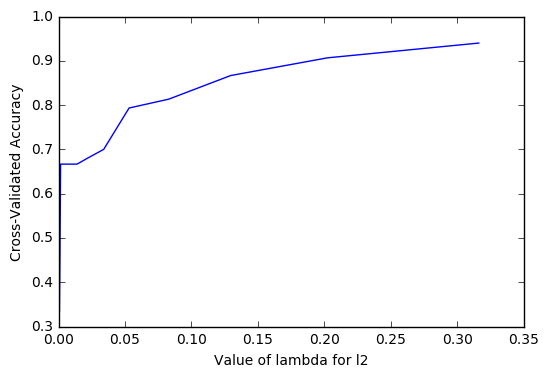

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of lambda for ridge (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(lambda_range, lambda_scores)
plt.xlabel('Value of lambda for l2')
plt.ylabel('Cross-Validated Accuracy')